##  Box plot 이상탐지(통계적 기법)
___
* 정의
```
# 많은 데이터를 눈으로 확인하기 어려울 때 그림을 이용해 데이터 집합의 범위와 중앙값을 빠르게 확인(EDA 때도 활용됨)
# Box plot은 최소 정상값(min), 1사분위수(Q1), 중앙값(Q2), 3사분위수(Q3), 최대 정상값(max)를 나타내는 시각화 방법
```
<img src = "https://drive.google.com/uc?id=1pQT3D1JhZXEL5Cc79fZJAd5F3LORGezM">

* 장단점
```
  # [good] 데이터를 눈으로 확인하기 어려울 때, 그림을 이용해 데이터의 범위를 빠르게 파악
  # [good] 통계적으로 이상치(Outlier)가 있는지 확인 가능
  # [good] 다양한 정보를 손쉽게 표현할 수 있음
  # [bad] 위치정보에 기반하고 있기 때문에 분포를 확인하기는 어려움
  # [bad] 가운데 선은 평균이 아니다. 오해 소지가 있음
```
  
* 사용방법
```
# 주어진 데이터에서 각 사분위수를 계산한다.
# 그래프에서 제 1사분위수와 제 3사분위수를 기준으로 박스를 그린다.
# 제 2사분위수에 해당하는 위치에 선을 긎는다.
# 제 3사분위수에서 1.5*IQR을 더한 위치에 가로 선을 긋고 제 3사분위수부터 가로선까지 세로선을 긋는다.
# 제 1사분위수에서 1.5*IQR을 뺀 위치에 가로 선을 긋고 제 1사분위수부터 가로선까지 세로선을 긋는다.
# 4,5번에 그은 직선을 넘어서는 위치에 존재하는 값은 동그라미와 같은 기호로 표시한다.(이상치 의미) 
```

* 용어
```
# median - 중앙값
# IQR : 25% ~ 75%에 해당한 부분 
# 75th Percentile : 제 3사분위수
# 25th Percentile : 제 1사분위수
# Whisker : 최댓값, 최솟값
# Outlier : 이상치 (Q3+1.5 IQR, Q1-1.5 IQR)
```

* 현업사례
```
# EDA 단계에서 많이 사용됨
# 공정 센서 데이터 이상탐지
# 검사 및 측정 데이터 이상탐지 
```
   


### 실습
___

In [14]:
# Box plot 그려보기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['default'])

test = pd.DataFrame([34, 5, 9, 10 ,15, 20, 1])
test

,0
0,34
1,5
2,9
3,10
4,15
5,20
6,1


<Axes: >

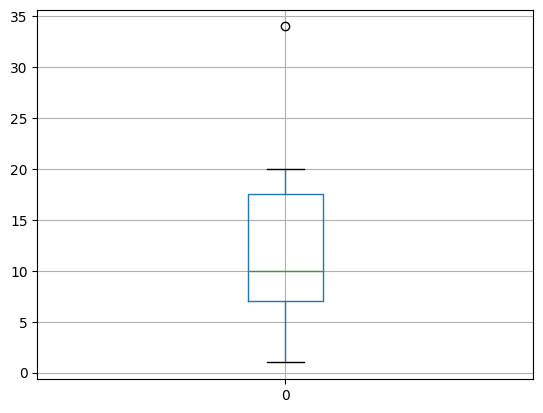

In [2]:
test.boxplot()

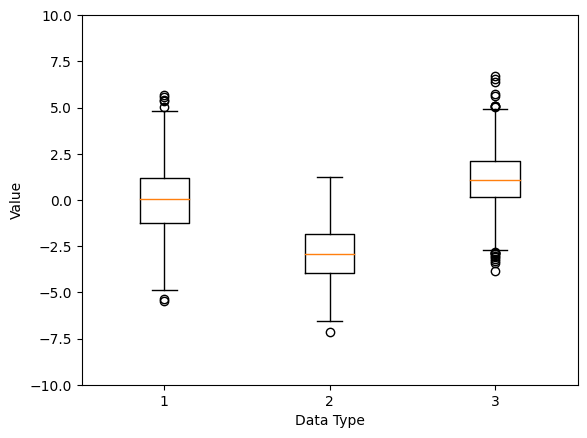

whiskers: [array([-1.26993466, -4.89499409]), array([1.20778257, 4.80484755]), array([-3.93179531, -6.55202642]), array([-1.8349773 ,  1.22194834]), array([ 0.14225094, -2.72456136]), array([2.09846005, 4.93493593])]
medians: [array([0.05275111, 0.05275111]), array([-2.90905747, -2.90905747]), array([1.0982812, 1.0982812])]
fliers: [array([-5.44554019, -5.38478777,  5.6597219 ,  5.42582442,  5.36348776,
        5.05286502,  5.58939074]), array([-7.14766201]), array([-3.04443773, -2.92375602, -2.85567232, -2.86698758, -3.29609601,
       -3.09928819, -2.89879051, -3.43522682, -2.83876628, -3.83501266,
       -3.20137498,  6.71255117,  6.51669183,  6.40544759,  5.10423577,
        5.08267306,  5.6107774 ,  5.06798309,  5.03764921,  5.73972101])]


In [3]:
# Box plot 그려보기
import numpy as np
import matplotlib.pyplot as plt

data_a = np.random.normal(0, 2.0, 1000)
data_b = np.random.normal(-3.0, 1.5, 500)
data_c = np.random.normal(1.2, 1.5, 1500)

labels = ['data_a', 'data_b', 'data_c']

box = plt.boxplot([data_a, data_b, data_c], whis=1.5)  # whis 1.5는 기본값
plt.ylim(-10.0, 10.0)
plt.xlabel('Data Type')
plt.ylabel('Value')
plt.show()

whiskers = [item.get_ydata() for item in box['whiskers']]
medians = [item.get_ydata() for item in box['medians']]
fliers = [item.get_ydata() for item in box['fliers']]

print('whiskers:', whiskers)
print('medians:', medians)
print('fliers:', fliers)

In [4]:
import scipy.stats as stats
shapiro_test = stats.shapiro(data_a)
shapiro_test
# pvalue가 0.05 이상이므로 정규분포임.

ShapiroResult(statistic=0.9984028339385986, pvalue=0.49281343817710876)

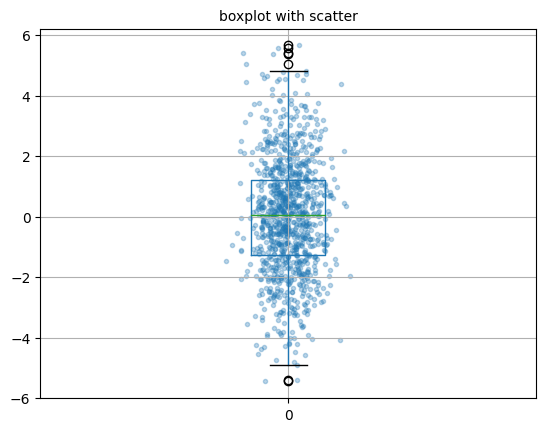

In [5]:
# boxplot의 단점이 분포를 알 수 없는 것이다.
df=pd.DataFrame(data_a)
df.boxplot()

# boxplot위에 점을 찍어보자. enumerate() : index과 column_name을 동시에 끄집어 내자.
for i, d in enumerate(df):
    y = df[d]
    x = np.random.normal(i+1, 0.04, len(y)) # np.random.normal(loc, scale, size), loc: 분포의 평균, scale : 표준편차, size : 출력크기
    plt.scatter(x, y, alpha=0.3, marker=".")
    
plt.title("boxplot with scatter", fontsize=10)
plt.show()

In [6]:
# Outlier 검출하기
def get_box_plot_data(labels, bp):
    rows_list = []
    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile(Q1)'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile(Q3)'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        dict1['Outlier'] = bp['fliers'][i].get_ydata()
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

In [7]:
# Box plot summary
get_box_plot_data(labels, box)

,label,lower_whisker,lower_quartile(Q1),median,upper_quartile(Q3),upper_whisker,Outlier
0,data_a,-4.894994,-1.269935,0.052751,1.207783,4.804848,"[-5.445540191603116, -5.384787770163555, 5.659..."
1,data_b,-6.552026,-3.931795,-2.909057,-1.834977,1.221948,[-7.1476620070351835]
2,data_c,-2.724561,0.142251,1.098281,2.098460,4.934936,"[-3.04443773275578, -2.9237560238295837, -2.85..."


In [8]:
# Box plot Outlier 객체 출력
fliers = [item.get_ydata() for item in box['fliers']]
fliers

[array([-5.44554019, -5.38478777,  5.6597219 ,  5.42582442,  5.36348776,
         5.05286502,  5.58939074]),
 array([-7.14766201]),
 array([-3.04443773, -2.92375602, -2.85567232, -2.86698758, -3.29609601,
        -3.09928819, -2.89879051, -3.43522682, -2.83876628, -3.83501266,
        -3.20137498,  6.71255117,  6.51669183,  6.40544759,  5.10423577,
         5.08267306,  5.6107774 ,  5.06798309,  5.03764921,  5.73972101])]

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

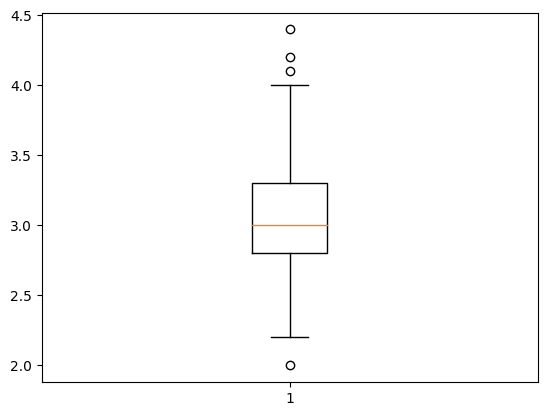

In [20]:
box = plt.boxplot(iris['sepal_width'])
plt.show()

In [24]:
whiskers = [item.get_ydata() for item in box['whiskers']]
medians = [item.get_ydata() for item in box['medians']]
fliers = [item.get_ydata() for item in box['fliers']]

print('whiskers:', whiskers)
print('medians:', medians)
print('fliers:', fliers)

whiskers: [array([2.8, 2.2]), array([3.3, 4. ])]
medians: [array([3., 3.])]
fliers: [array([2. , 4.4, 4.1, 4.2])]


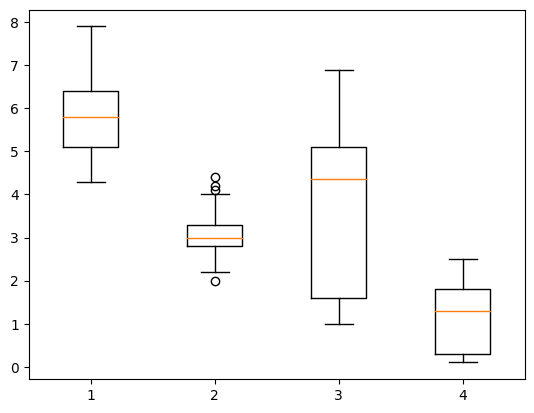

In [52]:
iris_box = plt.boxplot(iris.iloc[:,:-1])
plt.show()

In [ ]:
# Outlier 검출하기
def get_box_plot_data(labels, bp):
    rows_list = []
    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile(Q1)'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile(Q3)'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        dict1['Outlier'] = bp['fliers'][i].get_ydata()
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

In [46]:
labels = iris.columns[:-1]
labels

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [47]:
box_fliers = get_box_plot_data(labels, iris_box)
box_fliers

,label,lower_whisker,lower_quartile(Q1),median,upper_quartile(Q3),upper_whisker,Outlier
0,sepal_length,4.3,5.1,5.80,6.4,7.9,[]
1,sepal_width,2.2,2.8,3.00,3.3,4.0,"[2.0, 4.4, 4.1, 4.2]"
2,petal_length,1.0,1.6,4.35,5.1,6.9,[]
3,petal_width,0.1,0.3,1.30,1.8,2.5,[]


In [48]:
box_fliers['Outlier']

0                      []
1    [2.0, 4.4, 4.1, 4.2]
2                      []
3                      []
Name: Outlier, dtype: object

In [79]:
[1 if v == 0 else v.get_ydata() for v in iris_box['fliers']]

[array([], dtype=float64),
 array([2. , 4.4, 4.1, 4.2]),
 array([], dtype=float64),
 array([], dtype=float64)]

In [81]:
[0 if len(v.get_ydata()) == 0 else v.get_ydata() for v in iris_box['fliers']]


[0, array([2. , 4.4, 4.1, 4.2]), 0, 0]

In [92]:
import pandas as pd
import numpy as np

# 정규 분포를 이용하여 데이터 분포에 타원(elliptic)을 그림, 타원에서 벗어날수록 outlier
# 마할라노비스 이상탐지 방법
from sklearn.covariance import EllipticEnvelope
# 랜덤 데이터를 생성하는데 사용됩니다. (※ 모든 방향으로 같은 성질을 가지는 정규분포를 이용해 
# 가상 데이터 생성 클러스링 용 가상데이터를 생성하는데 사용하는 데이터세트)
from sklearn.datasets import make_blobs

# 랜덤 데이터 생성, 샘플수도 변경해보세요. 
X, y = make_blobs(n_samples = 100,
                  n_features = 2,
                  centers = 1,
                  random_state = 1)


# 이상치 Input
X[0,0] = 10 # feature 0에 0번째 데이터
X[0,1] = -10 # feature 1에 0번째 데이터

In [93]:
# EllipticEnvelope 을 이용하여 outlier를 검출하기 위한 객체를 생성합니다.
# The amount of "contamination" of the data set, i.e. the proportion of outliers in the data set
# 데이터세트에서 outlier의 비율, contamination 하이퍼파라미터도 조절해보세요.
outlier_detector = EllipticEnvelope(contamination=.1)

# EllipticEnvelope 객체를 생성한 데이터 학습
outlier_detector.fit(X)

# outlier를 검출
# +1 이면 boundary 안에 들어온 값으로 정상 데이터
# -1 이면 outlier로 간주.
pred = outlier_detector.predict(X)
pred

array([-1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1])

In [90]:
outlier_detector.predict([[-5,5], [-1,5]])

array([-1,  1])

In [91]:
outlier_detector.dist_

array([6.38030910e+02, 2.37675311e+00, 5.18485012e+00, 6.96781548e-01,
       1.17856179e+01, 8.26866314e-01, 8.18037013e-01, 1.62665148e+00,
       5.59309870e+00, 2.54350068e-01, 3.69810439e+00, 1.65038773e+00,
       6.58883434e-01, 6.16956906e+00, 1.54721942e+01, 1.34368276e+00,
       5.50799697e-01, 2.16308841e+00, 5.17348890e-01, 3.29567641e+00,
       3.39015515e-01, 3.68507569e-01, 1.88458380e-01, 1.90311608e-01,
       1.03813208e+00, 8.30736387e+00, 2.06041651e-01, 2.80644855e-01,
       1.08758824e+01, 2.41256356e+00, 8.06075447e-01, 3.39439858e+00,
       2.06435587e+00, 1.27817198e+00, 4.24633990e+00, 2.48863008e-01,
       2.12806248e+00, 5.07629280e+00, 7.01302871e-01, 1.91647676e-01,
       5.38702177e-02, 2.72620597e+00, 6.20802450e-01, 4.62753871e+00,
       9.31301220e-03, 2.68070967e-01, 1.22630005e+00, 1.25934961e+01,
       3.48226544e+00, 1.34093646e+00, 3.32936068e-01, 4.75450584e+00,
       4.94705550e-01, 1.70136227e+00, 4.69799841e-01, 3.26049172e-01,
      

In [94]:
# ▶ Raw data + Pred data
df = pd.DataFrame(X, columns=['col1', 'col2'])
df['outlier'] = pred
df

,col1,col2,outlier
0,10.000000,-10.000000,-1
1,-0.813399,3.546974,1
2,-3.103674,3.902024,1
3,-1.429465,5.168501,1
4,0.868766,4.157855,-1
...,...,...,...
95,-0.620735,6.593470,-1
96,-1.642150,3.284471,1
97,-1.373973,5.291631,1
98,-0.848608,5.450932,1


<Figure size 640x480 with 0 Axes>

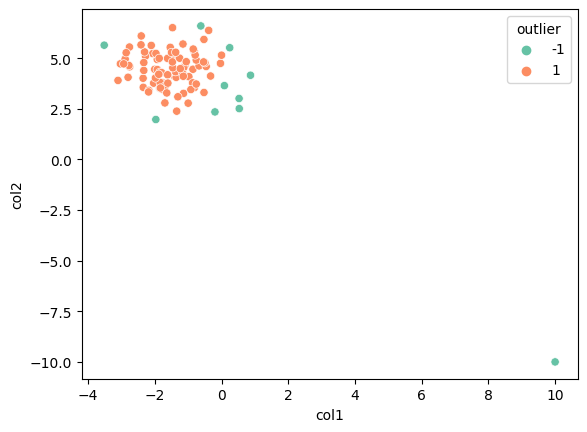

In [104]:
plt.figure()
sns.scatterplot(x='col1', y='col2', data=df, hue='outlier', palette='Set2')
plt.show()

In [148]:
from pyod.utils.example import visualize  # 시각화
from pyod.utils.data import evaluate_print  # 평가용
from pyod.utils.data import generate_data # 연습용 데이터 생성
from pyod.models.knn import KNN

# 하이퍼 파라미터
contamination = 0.1  # ▶ percentage of outliers
n_train = 300        # ▶ number of training points
n_test = 100         # ▶ number of testing points

# ▶ Generate sample data
X_train, X_test, y_train, y_test = generate_data(n_train=n_train, n_test=n_test,
                  n_features=2,
                  contamination=contamination,
                  random_state=42)

In [149]:
X_train.shape, y_train.shape

((300, 2), (300,))

In [150]:
X_test.shape

(100, 2)

In [151]:
# ▶ 모델 생성 및 학습
clf_name = 'KNN' # 나중에 평가용 함수에서 출력용으로 사용
clf = KNN(n_neighbors=5)
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [152]:
# ▶ Train set score
# 위에서 fitting(훈련)했으니 
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_

In [153]:
# ▶ Test set score
y_test_pred = clf.predict(X_test)
y_test_scores = clf.decision_function(X_test)

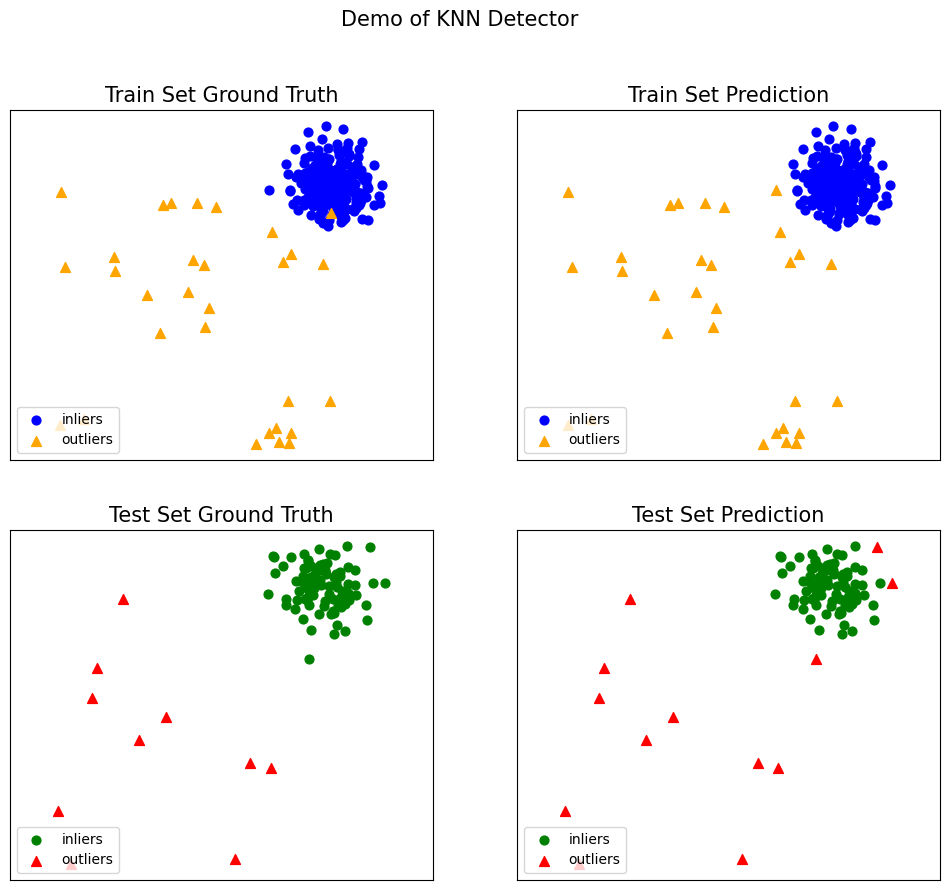

In [154]:
# ▶ visualize the results
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=True)